In [341]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from my_OIB_functions import *
import fatiando
import pandas as pd
%matplotlib inline

In [342]:
def oib_lineplot_cust(data, ptitle='test_lineplot', pname='test_lineplot'):
    import matplotlib.pyplot as plt
    data.loc[data['HYDROAPPX'] < -1500, 'HYDROAPPX'] = np.nan
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), facecolor='white')
    data['FAG070'].where((data['FLTENVIRO'] == 1)).plot(ax=axes[0], legend=True, label='Disturbed', style='r-')
    data['FAG070'].where((data['FLTENVIRO'] == 0)).plot(ax=axes[0], legend=True, label='Normal', style='k-')
    # data['FAG070'].where((data['FLTENVIRO'] == -1)).plot(ax=axes[0], legend=True, label='Missing', style='b-')
#     data['ELEVATION'].plot(ax=axes[1], legend=True, style='y.')
    data['ICEBASE'].plot(ax=axes[1], legend=True, marker=".", linestyle="None", color="brown")
    data['TOPOGRAPHY_radar'].plot(ax=axes[1], legend=True, marker=".", linestyle="None", color="blue")
#     data['HYDROAPPX'].plot(ax=axes[1], legend=True, color='grey')
    data['SURFACE_atm'].where((data['NUMUSED'] > 77)).plot(ax=axes[1], legend=True, 
                                                           marker=".", linestyle="None", color='cyan')
    plt.suptitle(ptitle, y=0.98)
#     plt.savefig(pname, bbox_inches='tight')   # save the figure to file
#     plt.close(fig)
    return


def haversine(origin, destination):
    # Source: http://www.platoscave.net/blog/2009/oct/5/calculate-distance-latitude-longitude-python/
    import math
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) \
                                                  * math.cos(math.radians(lat2)) * math.sin(dlon / 2) * math.sin(
        dlon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    return d


def make_outline(top, bottom):
    outline = np.append(top[0], np.concatenate([np.append(top, top[-1:]), np.append(bottom[-1:], bottom[::-1])], axis=0))
    outline = np.append(outline, bottom[0])
    outline = np.append(outline, top[0])
    return outline

def make_outline_dist(x, pad=1e6):
    xs = np.append(-pad, np.concatenate([np.append(x, np.max(x)+pad), np.append(np.max(x)+pad, x[::-1])], axis=0))
    xs = np.append(xs, -pad)
    xs = np.append(xs, -pad)
    return xs

## Read in an entire flight

In [344]:
# df = pd.read_csv('data/integrated/forward/OIB_2016-10-24_forward.csv')
df = pd.read_csv('data/integrated/OIB_2014-11-08.csv')
# oib_lineplot_cust(df)

## Read in an entire flight

In [345]:
gb = df.groupby(['LINE'])

# gb.describe()

# gb['FAG070'].describe()

# Group the dataframe by regiment, and for each regiment,
for name, group in gb:
    print(name)
#     print(group['FAG070'].describe())

1415441805
1415448658
1415449020
1415449127
1415461548
1415461675
1415465890
1415466045
1415468043
1415468258
1415469275
1415469552
1415471654
1415472100
1415474250
1415474352
1415485286
1415485362
1415487956
1415488064
1415488326


In [347]:
segment = 1415466045
# plt.plot(df['LINE'].where((df['LINE'] == segment)))
# oib_lineplot_cust(df.where((df['LINE'] == segment)))

# gb[["TIME", "FAG070"]].get_group(segment)
lf = gb.get_group(segment)

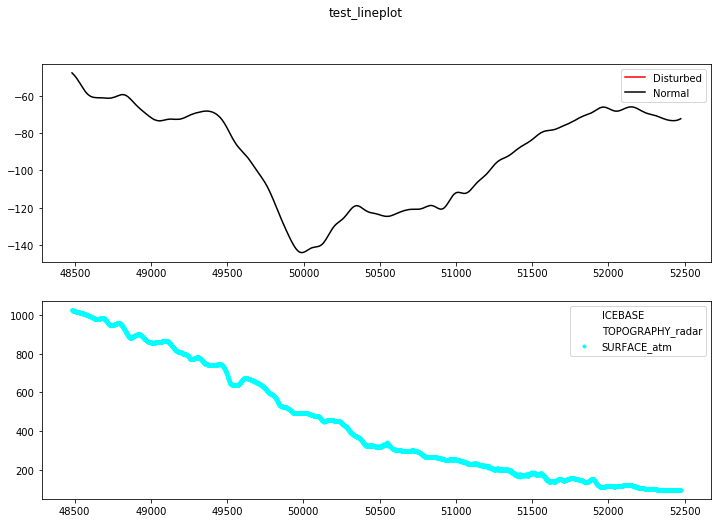

In [348]:
oib_lineplot_cust(lf)

In [350]:
lf.head()

,iunix,LAT,LONG,DATE,DOY,TIME,FLT,PSX,PSY,WGSHGT,...,QUALITY,SURFACE_atm,NUMUSED,ICEBASE,TOPOGRAPHY_radar,D_gravmask,LINE,surface_recalc,icebase_recalc,HYDROAPPX
48480,2014-11-08 17:00:45.000,-79.729370,-19.116955,2014-11-08,312,61245.0,514,-366406.19,1057106.12,1453.57,...,NaN,NaN,NaN,NaN,NaN,1,1415466045,NaN,NaN,NaN
48481,2014-11-08 17:00:45.500,-79.729502,-19.120058,2014-11-08,312,61245.5,514,-366458.72,1057072.69,1452.35,...,NaN,NaN,NaN,NaN,NaN,1,1415466045,NaN,NaN,NaN
48482,2014-11-08 17:00:46.000,-79.729631,-19.123164,2014-11-08,312,61246.0,514,-366511.37,1057039.41,1451.11,...,NaN,NaN,NaN,NaN,NaN,1,1415466045,NaN,NaN,NaN
48483,2014-11-08 17:00:46.500,-79.729759,-19.126274,2014-11-08,312,61246.5,514,-366564.18,1057006.34,1449.87,...,NaN,1026.9586,378.0,NaN,NaN,1,1415466045,1026.9586,NaN,NaN
48484,2014-11-08 17:00:47.000,-79.729883,-19.129389,2014-11-08,312,61247.0,514,-366617.16,1056973.50,1448.69,...,NaN,1026.9586,378.0,NaN,NaN,1,1415466045,1026.9586,NaN,NaN


# Fatiando testing

In [351]:
from fatiando.gravmag import talwani
from fatiando.mesher import Polygon
from fatiando.vis import mpl
import numpy as np


rho_a = 0
rho_i = 915
rho_w = 1005
rho_r = 2670

## Crossing Horizons

In [352]:
# df.ix[selection criteria, columns I want] = value
lf.loc[lf['SURFACE_atm']-lf['ICEBASE'] <= 0, 'ICEBASE'] = (lf['SURFACE_atm'] - 0.1)
# lf['ICEBASE_adj'] = lf['ICEBASE'].where(lf['SURFACE_atm']-lf['ICEBASE'] <= 0)


In [353]:
lf['TIME'].values[1]

61245.5

## Read in an entire flight

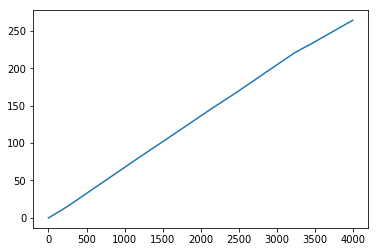

In [354]:
# Compute distance along transect
dist = np.zeros((np.size(lf['LONG'])))
for i in range(2, np.size(lf['LONG'])):
    dist[i] = dist[i - 1] + haversine([lf['LAT'].values[i - 1],lf['LONG'].values[i - 1]],
              [lf['LAT'].values[i],lf['LONG'].values[i]])
plt.plot(dist)

In [355]:
lf.columns

Index([u'iunix', u'LAT', u'LONG', u'DATE', u'DOY', u'TIME', u'FLT', u'PSX',
       u'PSY', u'WGSHGT', u'FX', u'FY', u'FZ', u'EOTGRAV', u'FACOR', u'INTCOR',
       u'FAG070', u'FAG100', u'FAG140', u'FLTENVIRO', u'UNIX', u'THICK',
       u'ELEVATION', u'FRAME', u'SURFACE_radar', u'BOTTOM', u'QUALITY',
       u'SURFACE_atm', u'NUMUSED', u'ICEBASE', u'TOPOGRAPHY_radar',
       u'D_gravmask', u'LINE', u'surface_recalc', u'icebase_recalc',
       u'HYDROAPPX'],
      dtype='object')

In [356]:
print lf.loc[:, 'TIME'].values
print lf.loc[:, 'TIME'].values
print lf.iloc[0:3, 5]
lf.loc[27689:, 'TIME'].values
# int(np.max(icesfc)+1)

[61245.  61245.5 61246.  ... 63241.5 63242.  63242.5]
[61245.  61245.5 61246.  ... 63241.5 63242.  63242.5]
48480    61245.0
48481    61245.5
48482    61246.0
Name: TIME, dtype: float64


array([61245. , 61245.5, 61246. , ..., 63241.5, 63242. , 63242.5])

# Model Setup

## ADD block extensions

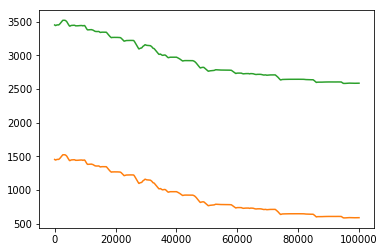

In [357]:
'''
Extract data from DataFrame
'''

# lf['SURFACE_atm'].interpolate(method='linear', limit_area='inside', axis=0, inplace=True)  #limit_direction='forward'
lf['TOPOGRAPHY_radar'].interpolate(method='linear', limit_area='inside', axis=0, inplace=True)  #limit_direction='forward'
lf['ICEBASE'].interpolate(method='linear', limit_area='inside', axis=0, inplace=True)  #limit_direction='forward'


fag070 = lf['FAG070'][0:].values
elevation = lf['WGSHGT'][0:].values
# icesfc = lf['SURFACE_atm'][0:].values
icesfc = lf['TOPOGRAPHY_radar'][0:].values
icebase = lf['ICEBASE'][0:].values
'''
Convert OIB data to polygon arrays
'''
# iceoutline = np.append(np.concatenate([icesfc, icebase[::-1]], axis=0), icesfc[0]) # no extension
iceoutline = make_outline(icesfc, icebase)
# plt.figure(facecolor='white'); plt.plot(iceoutline[1180:1220])

rockbase = -30000*np.ones_like(icebase)
# rockoutline = np.append(icebase[0], np.concatenate([icebase, z_r], axis=0), icebase[0], icebase[0])
rockoutline = make_outline(icebase, rockbase)

x = np.linspace(0, 100000, len(icebase))#[::-1]
xs = make_outline_dist(x, 1e6)
# plt.figure(facecolor='white'); plt.plot(xs[1180:1220])

# depths of calculations points
z = elevation + 2000
# z = int(np.nanmax(icesfc)+1)*np.ones_like(x)

plt.figure(facecolor='white')
plt.plot(xs, iceoutline) 
# plt.plot(x, icesfc) 
# plt.plot(x, icebase) 
plt.plot(x, elevation)
plt.plot(x, z) 
'''
Build the Polygon
'''
props = {'density': rho_i}
props2 = {'density': rho_r}
polygon = Polygon(np.transpose([xs, iceoutline]), props)
polygons = [Polygon(np.transpose([xs, iceoutline]), props), 
            Polygon(np.transpose([xs, rockoutline]), props2)
            ]

## One Block

nan


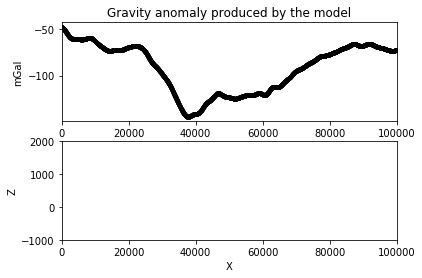

In [358]:
'''
Forward Model
'''
gz = talwani.gz(x, z, [polygon])
gz_adj = (gz - np.mean(gz)) + np.mean(fag070)
n = len(gz_adj)
rmse = np.linalg.norm(gz_adj - fag070) / np.sqrt(n)
print rmse
'''
Plot
'''
mpl.figure(facecolor='white')
mpl.axis('scaled')
ax1 = mpl.subplot(2, 1, 1)
mpl.title(r"Gravity anomaly produced by the model")
mpl.plot(x, gz, '-r', linewidth=2)
# mpl.plot(x, gz-fag070, '-b', linewidth=1)
mpl.plot(x, fag070, '.-k', linewidth=2)
mpl.xlim(min(x), max(x))
mpl.ylabel("mGal")
# ax1.annotate(str(int(rmse)), xy=(100, 0), xytext=(100, 0))
ax2 = mpl.subplot(2, 1, 2)
mpl.polygon(polygon, '.-k', linewidth=1, fill='cyan', alpha=0.5)
# mpl.polygon(polygons[1], '.-k', linewidth=1, fill='orange', alpha=0.5)
mpl.xlim(min(x), max(x))
mpl.ylim(-1000, 2000)
mpl.xlabel("X")
mpl.ylabel("Z")
mpl.show()

## TWO blocks

nan
nan


TypeError: cannot concatenate 'str' and 'int' objects

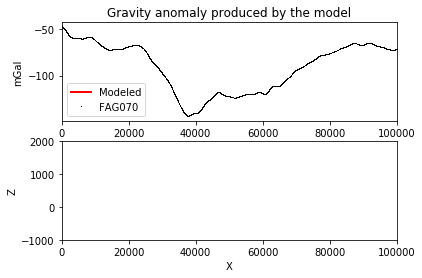

In [360]:
'''
Forward Model
'''
gz = talwani.gz(x, z, polygons)
gz_adj = (gz - np.mean(gz)) + np.mean(fag070)
n = len(gz_adj)
rmse = np.linalg.norm(gz_adj - fag070) / np.sqrt(n)
print (np.mean(gz) - np.mean(fag070))
print rmse
'''
Plot
'''
###
mpl.figure(facecolor='white')
mpl.axis('scaled')
ax1 = mpl.subplot(2, 1, 1)
mpl.title(r"Gravity anomaly produced by the model")
mpl.plot(x, gz_adj, '-r', linewidth=2, label='Modeled')
# mpl.plot(x, gz-fag070, '-b', linewidth=1)
mpl.plot(x, fag070, color='k', linestyle="None", marker=',', label='FAG070')
mpl.xlim(min(x), max(x))
mpl.ylabel("mGal")
mpl.legend()
# ax1.annotate('rmse: '+str(int(rmse))+' mGal', xy=(1000, 0), xytext=(1000, 0))
###
ax2 = mpl.subplot(2, 1, 2)
mpl.polygon(polygons[0], '.-k', linewidth=1, fill='cyan', alpha=0.5)
mpl.polygon(polygons[1], '.-k', linewidth=1, fill='orange', alpha=0.5)
mpl.xlim(min(x), max(x))
mpl.ylim(-1000, 2000)
mpl.xlabel("X")
mpl.ylabel("Z")
mpl.savefig('figs/test_OIB_' + str(segment) + '_forward.png', bbox_inches='tight')
mpl.show()

## Three Blocks

In [362]:
if lf['icebase_recalc'].isnull().all():
    print('No Icebase for this flight...')
    lf['icebase_recalc'] = lf['surface_recalc'] - 1

lf['ICESFC2'] = lf['surface_recalc']
lf['ICESFC2'].interpolate(method='pad', inplace=True)
lf['ICEBASE2'] = lf['icebase_recalc']
lf['ICEBASE2'].interpolate(method='linear', limit_area='inside', axis=0, inplace=True)
            

if [segment==1477341085]:
    # make ice 1 meter thick at end of line 
    # TODO not just 'end'
    lf['ICEBASE2'].iloc[-1] = lf['surface_recalc'].iloc[-1] - 1
    
    #Find ice front position
    waterstart = lf['icebase_recalc'].last_valid_index() + 1
    print(waterstart)
    lf['ICEBASE2'].loc[waterstart] = lf['surface_recalc'].loc[waterstart] - 1
    
    # Now INNER interpolate new horizon
    lf['ICEBASE2'].interpolate(method='linear', limit_area='inside', axis=0, inplace=True)  #limit_direction='forward'
    
    # Check for crossing horizons AGAIN?
    lf.loc[lf['ICESFC2']-lf['ICEBASE2'] <= 0, 'ICEBASE2'] = (lf['ICESFC2'] - 0.1)

    # Create water base, set it to single depth below ice
    lf['WATERBASE2'] = lf['ICEBASE2'] - 1
    lf['WATERBASE2'].loc[waterstart:lf['WATERBASE2'].index[-1]] = lf['WATERBASE2'].loc[waterstart - 1]
else:
    # INNER interpolate new horizon
    lf['ICEBASE2'].interpolate(method='linear', limit_area='inside', axis=0, inplace=True)  #limit_direction='forward'
    
    # Create water base, set it to single depth below ice
    lf['WATERBASE2'] = lf['ICEBASE2'] - 1

lf['ICESFC2'].interpolate(method='linear', limit_area='inside', axis=0, inplace=True)  #limit_direction='forward'

'''
Convert OIB data to polygon arrays
'''
icebase = lf['ICEBASE2'][0:].values
waterbase = lf['WATERBASE2'][0:].values
# iceoutline = np.append(np.concatenate([icesfc, icebase[::-1]], axis=0), icesfc[0]) # no extension
iceoutline = make_outline(icesfc, icebase)
# plt.figure(facecolor='white'); plt.plot(iceoutline[1180:1220])

watertop = icebase
# waterbase = icebase - 1
wateroutline = make_outline(watertop, waterbase)

rocktop = waterbase
rockbase = -30000 * np.ones_like(waterbase)
# rockoutline = np.append(icebase[0], np.concatenate([icebase, z_r], axis=0), icebase[0], icebase[0])
rockoutline = make_outline(rocktop, rockbase)

### Distances
x = dist * 1000
xs = make_outline_dist(x, 1e6)

### Heights
# z = int(np.max(elevation))
# z = int(np.max(icesfc) + 1) * np.ones_like(x)
# z = elevation + int(np.max(icesfc)+1)
z = np.max(elevation) * np.ones_like(x)

'''
Build the Polygon
'''
props_i = {'density': rho_i}
props_r = {'density': rho_r}
props_w = {'density': rho_w}
# polygon = Polygon(np.transpose([xs, iceoutline]), props_i)
# polygons = [Polygon(np.transpose([xs, iceoutline]), props_i),
#             Polygon(np.transpose([xs, rockoutline]), props_r)
#             ]
polygons = [Polygon(np.transpose([xs, iceoutline]), props_i),
            Polygon(np.transpose([xs, wateroutline]), props_w),
            Polygon(np.transpose([xs, rockoutline]), props_r)
            ]

'''
Forward Model
'''
gz = talwani.gz(x, z, polygons)
gz_adj = (gz - np.mean(gz)) + np.mean(fag070)
n = len(gz_adj)
rmse = np.linalg.norm(gz_adj - fag070) / np.sqrt(n)
print (np.mean(gz) - np.mean(fag070))
print rmse
'''
Plot
'''
###
mpl.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
mpl.axis('scaled')
ax1 = mpl.subplot(2, 1, 1)
mpl.title(r"Gravity anomaly produced by the model")
mpl.plot(x, gz_adj, '-r', linewidth=2, label='Modeled')
# mpl.plot(x, gz-fag070, '-b', linewidth=1)
mpl.plot(x, fag070, color='k', linestyle="None", marker=',', label='FAG070')
mpl.xlim(min(x), max(x))
mpl.ylabel("mGal")
mpl.legend()
# ax1.annotate('rmse: '+str(int(rmse))+' mGal', xy=(1000, 0), xytext=(1000, 0))
###
ax2 = mpl.subplot(2, 1, 2)
mpl.polygon(polygons[0], '.-k', linewidth=1, fill='cyan', alpha=0.5)
mpl.polygon(polygons[1], '.-k', linewidth=1, fill='blue', alpha=0.5)
mpl.polygon(polygons[2], '.-k', linewidth=1, fill='orange', alpha=0.5)
mpl.xlim(min(x), max(x))
mpl.ylim(-1500, 2000)
mpl.xlabel("X")
mpl.ylabel("Z")
mpl.savefig('figs/test_OIB_' + str(segment) + '_forward.png', bbox_inches='tight')
mpl.show()

No Icebase for this flight...


/Users/dporter/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dporter/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/dporter/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

52476


/Users/dporter/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


KeyError: u'the label [52476] is not in the [index]'

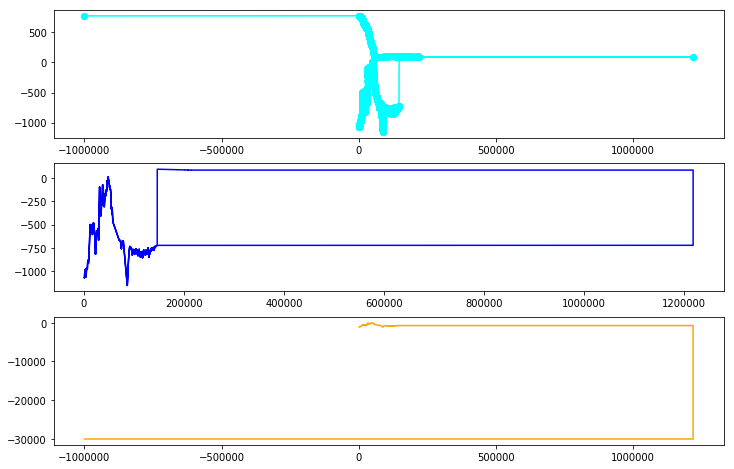

In [179]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))
axes[0].plot(xs, iceoutline, color='cyan', marker='o')
axes[1].plot(xs, wateroutline, color='blue')
axes[2].plot(xs, rockoutline, color='orange')

### Debugging blocks

In [318]:
lf['ICESFC2'] = lf['surface_recalc']
lf['ICESFC2'].interpolate(method='pad', inplace=True)
lf['ICEBASE2'] = lf['icebase_recalc']
lf['ICEBASE2'].interpolate(method='linear', limit_area='inside', axis=0, inplace=True)

if [segment==1477341085]: 
    #Find ice front position
    firstmean = np.mean(lf['icebase_recalc'].iloc[:5])
    if np.isnan(firstmean):
        print('Missing data at start of line.')
        firsticepoint = lf['icebase_recalc'].first_valid_index() - 1
        if lf['ICESFC2'].loc[firsticepoint] >= 120:
            print('NOT floating.')
            lf['ICEBASE2'].interpolate(method='linear', limit_direction='backward', axis=0, inplace=True)
        else:
            # make ice constant thick at end of line
            print('LIKELY floating.')
            lf['ICEBASE2'].loc[firsticepoint] = lf['ICESFC2'].loc[firsticepoint] - 1
            lf['ICEBASE2'].iloc[0] = lf['ICESFC2'].iloc[0] - 1
            # TODO or make ice 1 meter thick at end of line?
    else:
        print('NO missing data at start of line.')
    
    #Find ice front position
    lastmean = np.mean(lf['icebase_recalc'].iloc[-5:])
    if np.isnan(lastmean):
        print('Missing data at end of line.')
        lasticepoint = lf['icebase_recalc'].last_valid_index() + 1
        if lf['ICESFC2'].loc[lasticepoint] >= 120:
            print('NOT floating.')
            lf['ICEBASE2'].interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)
        else:
            # make ice constant thick at end of line 
            print('LIKELY floating.')
            lf['ICEBASE2'].loc[lasticepoint] = lf['ICESFC2'].loc[lasticepoint] - 1
            lf['ICEBASE2'].iloc[-1] = lf['ICESFC2'].iloc[-1] - 1
            # TODO or make ice 1 meter thick at end of line?
    else:
        print('NO missing data at end of line.')
                    
    ### Final INNER interpolation
    lf['ICEBASE2'].interpolate(method='linear', limit_area='inside', axis=0, inplace=True)        

    
    # Check for crossing horizons AGAIN?
#     lf.loc[lf['ICESFC2']-lf['ICEBASE2'] <= 0, 'ICEBASE2'] = (lf['ICESFC2'] - 0.1)

    # Create water base, set it to single depth below ice
    lf['WATERBASE2'] = lf['ICEBASE2'] - 1
    if np.mean(lf['ICESFC2'].iloc[:5]) < 120:
        print('Adding water block to START.')
        lf['WATERBASE2'].loc[lf['WATERBASE2'].index[0]:firsticepoint] = lf['WATERBASE2'].loc[firsticepoint+1]
    if np.mean(lf['ICESFC2'].iloc[-5:]) < 120:
        print('Adding water block to END.')
        lf['WATERBASE2'].loc[lasticepoint:lf['WATERBASE2'].index[-1]] = lf['WATERBASE2'].loc[lasticepoint-1]
else:
    # INNER interpolate new horizon
    lf['ICEBASE2'].interpolate(method='linear', limit_area='inside', axis=0, inplace=True)  #limit_direction='forward'
    
    # Create water base, set it to single depth below ice
    lf['WATERBASE2'] = lf['ICEBASE2'] - 1



'''
Convert OIB data to polygon arrays
'''
icesfc = lf['ICESFC2'][0:].values
icebase = lf['ICEBASE2'][0:].values
waterbase = lf['WATERBASE2'][0:].values
# iceoutline = np.append(np.concatenate([icesfc, icebase[::-1]], axis=0), icesfc[0]) # no extension
iceoutline = make_outline(icesfc, icebase)
# plt.figure(facecolor='white'); plt.plot(iceoutline[1180:1220])

watertop = icebase
# waterbase = icebase - 1
wateroutline = make_outline(watertop, waterbase)

rocktop = waterbase
rockbase = -30000 * np.ones_like(waterbase)
# rockoutline = np.append(icebase[0], np.concatenate([icebase, z_r], axis=0), icebase[0], icebase[0])
rockoutline = make_outline(rocktop, rockbase)

/Users/dporter/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Missing data at start of line.
NOT floating.
Missing data at end of line.
LIKELY floating.


/Users/dporter/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dporter/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/dporter/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-

Adding water block to END.
93.32680000000073


/Users/dporter/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [319]:
print("icesfc {}:\n{}...{}\n".format(icesfc.shape, icesfc[:5],icesfc[-5:]))
print("icebase {}:\n{}...{}\n".format(icebase.shape, icebase[:5],icebase[-5:]))
print("watertop {}:\n{}...{}\n".format(watertop.shape, watertop[:5],watertop[-5:]))
print("waterbase {}:\n{}...{}\n".format(waterbase.shape, waterbase[:5],waterbase[-5:]))
print("rocktop {}:\n{}...{}\n".format(rocktop.shape, rocktop[:5],rocktop[-5:]))
print("rockbase {}:\n{}...{}\n".format(rockbase.shape, rockbase[:5],rockbase[-5:]))

icesfc (2017,):
[768.8235 769.1995 769.5859 768.5173 768.3144]...[88.8835 87.9427 87.1213 86.5133 86.0824]

icebase (2017,):
[-1070.9699 -1070.9699 -1070.9699 -1070.9699 -1070.9699]...[85.14362119 85.12831589 85.1130106  85.0977053  85.0824    ]

watertop (2017,):
[-1070.9699 -1070.9699 -1070.9699 -1070.9699 -1070.9699]...[85.14362119 85.12831589 85.1130106  85.0977053  85.0824    ]

waterbase (2017,):
[-1071.9699 -1071.9699 -1071.9699 -1071.9699 -1071.9699]...[-723.0456 -723.0456 -723.0456 -723.0456 -723.0456]

rocktop (2017,):
[-1071.9699 -1071.9699 -1071.9699 -1071.9699 -1071.9699]...[-723.0456 -723.0456 -723.0456 -723.0456 -723.0456]

rockbase (2017,):
[-30000. -30000. -30000. -30000. -30000.]...[-30000. -30000. -30000. -30000. -30000.]



In [320]:
print("x {}:\n{:}\n{:}\n".format(x.shape, x[:5], x[-5:]))
print("dist {}:\n{:}\n{:}\n".format(dist.shape, dist[:5], dist[-5:]))
print("Iceoutline {}:\n{}\n{}\n".format(iceoutline.shape, iceoutline[:5],iceoutline[-5:]))
print("Wateroutline {}:\n{}\n{}\n".format(wateroutline.shape, wateroutline[:5],wateroutline[-5:]))
print("Rockoutline {}:\n{}\n{}\n".format(rockoutline.shape, rockoutline[:5],rockoutline[-5:]))
print("xs {}:\n{:}\n{:}\n".format(xs.shape, xs[:5], xs[-5:]))

x (2017,):
[  0.           0.          85.64481127 171.38822003 257.24057938]
[217730.09178968 217851.43065794 217972.78434843 218094.13974611
 218215.49096255]

dist (2017,):
[0.         0.         0.08564481 0.17138822 0.25724058]
[217.73009179 217.85143066 217.97278435 218.09413975 218.21549096]

Iceoutline (4039,):
[768.8235 768.8235 769.1995 769.5859 768.5173]
[-1070.9699 -1070.9699 -1070.9699 -1070.9699   768.8235]

Wateroutline (4039,):
[-1070.9699 -1070.9699 -1070.9699 -1070.9699 -1070.9699]
[-1071.9699 -1071.9699 -1071.9699 -1071.9699 -1070.9699]

Rockoutline (4039,):
[-1071.9699 -1071.9699 -1071.9699 -1071.9699 -1071.9699]
[-30000.     -30000.     -30000.     -30000.      -1071.9699]

xs (4039,):
[-1.00000000e+06  0.00000000e+00  0.00000000e+00  8.56448113e+01
  1.71388220e+02]
[ 8.56448113e+01  0.00000000e+00  0.00000000e+00 -1.00000000e+06
 -1.00000000e+06]



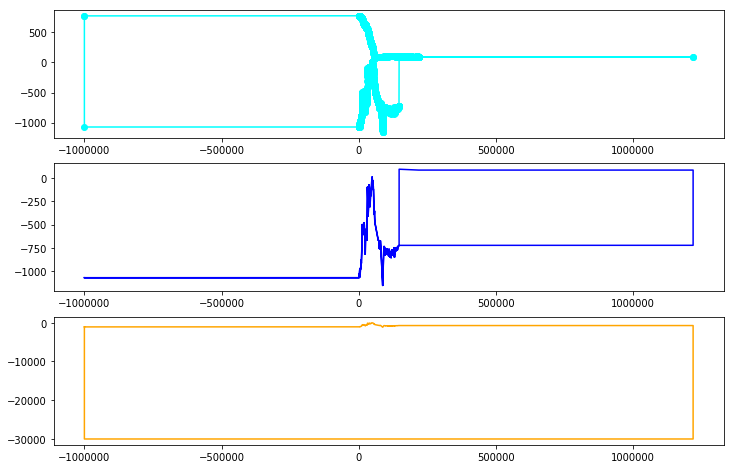

In [321]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))
axes[0].plot(xs, iceoutline, color='cyan', marker='o')
axes[1].plot(xs, wateroutline, color='blue')
axes[2].plot(xs, rockoutline, color='orange')

3295.4567045524605
10.831178738357055


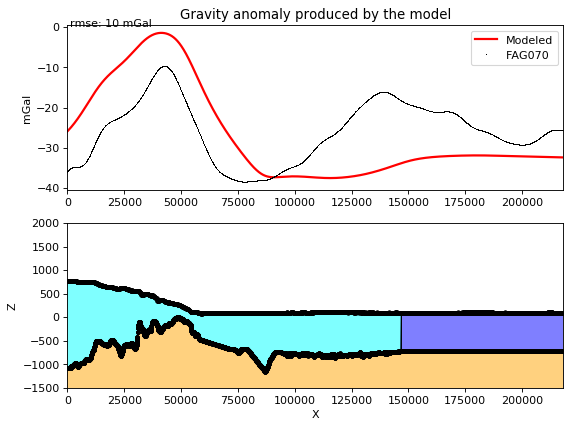

In [335]:
### Distances
x = dist * 1000
xs = make_outline_dist(x, 1e6)

### Heights
# z = int(np.max(elevation))
# z = int(np.max(icesfc) + 1) * np.ones_like(x)
# z = elevation + int(np.max(icesfc)+1)
z = np.max(elevation) * np.ones_like(x)

'''
Build the Polygon
'''
props_i = {'density': rho_i}
props_r = {'density': rho_r}
props_w = {'density': rho_w}
# polygon = Polygon(np.transpose([xs, iceoutline]), props_i)
# polygons = [Polygon(np.transpose([xs, iceoutline]), props_i),
#             Polygon(np.transpose([xs, rockoutline]), props_r)
#             ]
polygons = [Polygon(np.transpose([xs, iceoutline]), props_i),
            Polygon(np.transpose([xs, wateroutline]), props_w),
            Polygon(np.transpose([xs, rockoutline]), props_r)
            ]

'''
Forward Model
'''
gz = talwani.gz(x, z, polygons)
gz_adj = (gz - np.mean(gz)) + np.mean(fag070)
n = len(gz_adj)
rmse = np.linalg.norm(gz_adj - fag070) / np.sqrt(n)
print (np.mean(gz) - np.mean(fag070))
print rmse
'''
Plot
'''
###
mpl.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
mpl.axis('scaled')
ax1 = mpl.subplot(2, 1, 1)
mpl.title(r"Gravity anomaly produced by the model")
mpl.plot(x, gz_adj, '-r', linewidth=2, label='Modeled')
# mpl.plot(x, gz-fag070, '-b', linewidth=1)
mpl.plot(x, fag070, color='k', linestyle="None", marker=',', label='FAG070')
mpl.xlim(min(x), max(x))
mpl.ylabel("mGal")
mpl.legend()
ax1.annotate('rmse: '+str(int(rmse))+' mGal', xy=(1000, 0), xytext=(1000, 0))
###
ax2 = mpl.subplot(2, 1, 2)
mpl.polygon(polygons[0], '.-k', linewidth=1, fill='cyan', alpha=0.5)
mpl.polygon(polygons[1], '.-k', linewidth=1, fill='blue', alpha=0.5)
mpl.polygon(polygons[2], '.-k', linewidth=1, fill='orange', alpha=0.5)
mpl.xlim(min(x), max(x))
mpl.ylim(-1500, 2000)
mpl.xlabel("X")
mpl.ylabel("Z")
mpl.savefig('figs/test_OIB_forward.png', bbox_inches='tight')
mpl.show()

## NO block extension

In [336]:
# x = np.linspace(0, 100000, len(icebase))#[::-1]
# xs = make_outline_dist(x, 1e1)

# plt.figure(facecolor='white'); plt.plot(xs, iceoutline); plt.plot(x, elevation)
# '''
# Build the Polygon
# '''
# props = {'density': rho_r - rho_i}
# props2 = {'density': rho_r}
# polygon = Polygon(np.transpose([xs, iceoutline]), props)
# polygons = [Polygon(np.transpose([xs, iceoutline]), props), 
#             Polygon(np.transpose([xs, rockoutline]), props2)
#             ]
# '''
# Forward Model
# '''
# gz = talwani.gz(x, z, polygons)
# gz_adj = (gz - np.mean(gz)) + np.mean(fag070)
# n = len(gz_adj)
# rmse = np.linalg.norm(gz_adj - fag070) / np.sqrt(n)
# print rmse
# '''
# Plot
# '''
# ###
# mpl.figure(facecolor='white')
# mpl.axis('scaled')
# ax1 = mpl.subplot(2, 1, 1)
# mpl.title(r"Gravity anomaly produced by the model")
# mpl.plot(x, gz_adj, '-r', linewidth=2, label='Modeled')
# # mpl.plot(x, gz-fag070, '-b', linewidth=1)
# mpl.plot(x, fag070, '.-k', linewidth=2, label='FAG070')
# mpl.xlim(min(x), max(x))
# mpl.ylabel("mGal")
# mpl.legend()
# # ax1.annotate('rmse: '+str(int(rmse))+' mGal', xy=(1000, 0), xytext=(1000, 0))
# ###
# ax2 = mpl.subplot(2, 1, 2)
# mpl.polygon(polygons[0], '.-k', linewidth=1, fill='cyan', alpha=0.5)
# mpl.polygon(polygons[1], '.-k', linewidth=1, fill='orange', alpha=0.5)
# mpl.xlim(min(x), max(x))
# mpl.ylim(-1000, 2000)
# mpl.xlabel("X")
# mpl.ylabel("Z")
# mpl.savefig('figs/test_OIB_forward.png', bbox_inches='tight')
# mpl.show()

## Using Real Distances

In [337]:
# x = dist * 1000
# xs = make_outline_dist(x, 1e6)
# # plt.figure(facecolor='white'); plt.plot(xs[1180:1220])

# plt.figure(facecolor='white')
# plt.plot(xs, iceoutline) 
# # plt.plot(x, elevation)
# plt.plot(x, z) 
# '''
# Build the Polygon
# '''
# props = {'density': rho_i}
# props2 = {'density': rho_r}
# polygon = Polygon(np.transpose([xs, iceoutline]), props)
# polygons = [Polygon(np.transpose([xs, iceoutline]), props), 
#             Polygon(np.transpose([xs, rockoutline]), props2)
#             ]
# '''
# Forward Model
# '''
# gz = talwani.gz(x, z, polygons)
# gz_adj = (gz - np.mean(gz)) + np.mean(fag070)
# n = len(gz_adj)
# rmse = np.linalg.norm(gz_adj - fag070) / np.sqrt(n)
# print rmse
# '''
# Plot
# '''
# ###
# mpl.figure(facecolor='white')
# mpl.axis('scaled')
# ax1 = mpl.subplot(2, 1, 1)
# mpl.title(r"Gravity anomaly produced by the model")
# mpl.plot(x, gz_adj, '-r', linewidth=2, label='Modeled')
# # mpl.plot(x, gz-fag070, '-b', linewidth=1)
# mpl.plot(x, fag070, color='k', linestyle="None", marker=',', label='FAG070')
# mpl.xlim(min(x), max(x))
# ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e3))
# ax1.xaxis.set_major_formatter(ticks_x)
# mpl.ylabel("mGal")
# mpl.legend()
# # ax1.annotate('rmse: '+str(int(rmse))+' mGal', xy=(10, 0), xytext=(10, 0))
# ###
# ax2 = mpl.subplot(2, 1, 2)
# mpl.polygon(polygons[0], '.-k', linewidth=1, fill='cyan', alpha=0.5)
# mpl.polygon(polygons[1], '.-k', linewidth=1, fill='orange', alpha=0.5)
# mpl.xlim(min(x), max(x))
# mpl.ylim(-1000, 2000)
# mpl.xlabel("X")
# mpl.ylabel("Z")
# ax2.xaxis.set_major_formatter(ticks_x)
# mpl.savefig('figs/test_OIB_'+str(segment)+'_forward.png', bbox_inches='tight')
# mpl.show()

## Test elevation ("z") of forward model calculations 

14.60097937186865
10.831178738357055
15.331633016452026


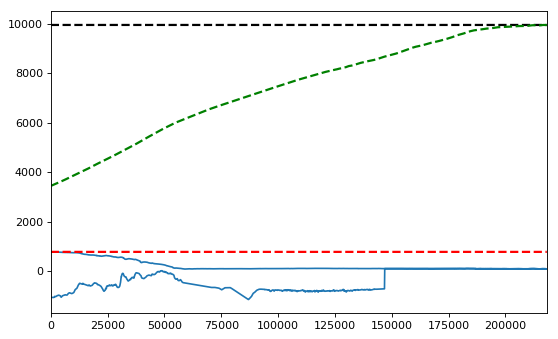

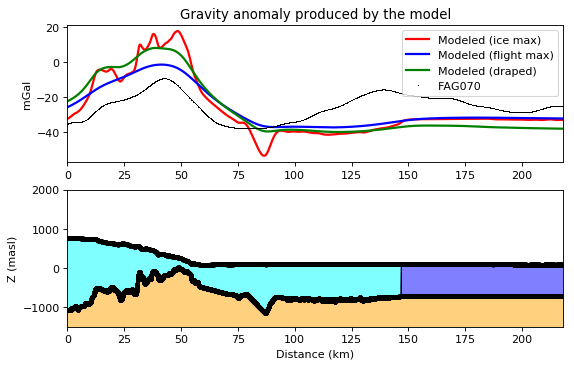

In [340]:
'''
Forward Model
'''
# depths of calculations points
z = int(np.max(icesfc)+1)*np.ones_like(x)
gz = talwani.gz(x, z, polygons)
gz_adj = (gz - np.mean(gz)) + np.mean(fag070)
n = len(gz_adj)
rmse = np.linalg.norm(gz_adj - fag070) / np.sqrt(n)
print rmse
'''
Forward Model #2 (modify Z)
'''
z2 = np.nanmax(elevation)*np.ones_like(x) #elevation + int(np.max(icesfc)+1)
gz = talwani.gz(x, z2, polygons)
gz_adj2 = (gz - np.mean(gz)) + np.mean(fag070)
rmse2 = np.linalg.norm(gz_adj2 - fag070) / np.sqrt(n)
print rmse2
'''
Forward Model #2 (modify Z)
'''
z3 = elevation
gz = talwani.gz(x, z3, polygons)
gz_adj3 = (gz - np.mean(gz)) + np.mean(fag070)
rmse3 = np.linalg.norm(gz_adj3 - fag070) / np.sqrt(n)
print rmse3
'''
Plot
'''
### Horizons
plt.figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(xs, iceoutline) 
# plt.plot(x, icebase, linewidth=1, color='orange', alpha=0.5)
plt.plot(x, z, '-r', linewidth=2, ls='dashed', label='Modeled (constant)')
plt.plot(x, z2, '-k', linewidth=2, ls='dashed', label='Modeled')
plt.plot(x, z3, '-g', linewidth=2, ls='dashed', label='Modeled (draped)')
plt.xlim(min(x), max(x))
# plt.ylim(-1000, max(z2))
# plt.legend()

### Model results
mpl.figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
mpl.axis('scaled')
ax1 = mpl.subplot(2, 1, 1)
mpl.title(r"Gravity anomaly produced by the model")
mpl.plot(x, gz_adj, '-r', linewidth=2, label='Modeled (ice max)')
mpl.plot(x, gz_adj2, '-b', linewidth=2, label='Modeled (flight max)')
mpl.plot(x, gz_adj3, '-g', linewidth=2, label='Modeled (draped)')
# mpl.plot(x, gz-fag070, '-b', linewidth=1)
mpl.plot(x, fag070, color='k', linestyle="None", marker=',', label='FAG070')
mpl.xlim(min(x), max(x))
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e3))
ax1.xaxis.set_major_formatter(ticks_x)
mpl.ylabel("mGal")
mpl.legend()
# ax1.annotate('rmse: '+str(int(rmse))+' mGal', 
#              xy=(min(x)*1.1, np.mean(gz)*1.1), xytext=(min(x)*1.1, np.mean(gz)*1.1))
# ax1.annotate('rmse: '+str(int(rmse))+' mGal', xy=(10,0), xytext=(10,0))
###
ax2 = mpl.subplot(2, 1, 2)
mpl.polygon(polygons[0], '.-k', linewidth=1, fill='cyan', alpha=0.5)
mpl.polygon(polygons[1], '.-k', linewidth=1, fill='blue', alpha=0.5)
mpl.polygon(polygons[2], '.-k', linewidth=1, fill='orange', alpha=0.5)
mpl.plot(x, z3, '-g', linewidth=2, label='Modeled (draped)')
mpl.xlim(min(x), max(x))
mpl.ylim(-1500, 2000)
mpl.xlabel("Distance (km)")
mpl.ylabel("Z (masl)")
ax2.xaxis.set_major_formatter(ticks_x)
mpl.savefig('figs/test_OIB_'+str(segment)+'_forward_elevationtest.png', bbox_inches='tight')
mpl.show()

# Some other segments

### 1) All grounded

/Users/dporter/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/Users/dporter/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/dporter/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

7.3707936895992825


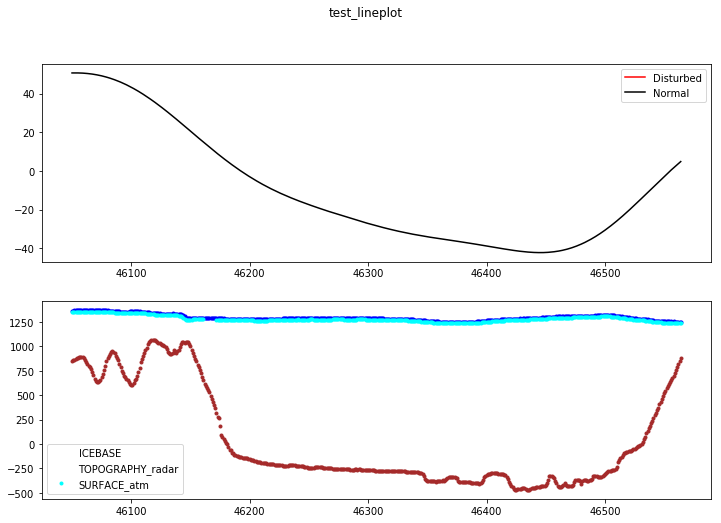

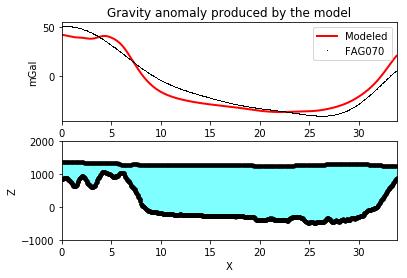

In [108]:
segment = 1477334733
# gb[["TIME", "FAG070"]].get_group(segment)
lf = gb.get_group(segment)
oib_lineplot_cust(lf)
lf.ix[lf['SURFACE_atm']-lf['ICEBASE'] <= 0, 'ICEBASE'] = (lf['SURFACE_atm'] - 0.1)

# Compute distance along transect
dist = np.zeros((np.size(lf['LONG'])))
for i in range(2, np.size(lf['LONG'])):
    dist[i] = dist[i - 1] + haversine([lf['LAT'].values[i - 1],lf['LONG'].values[i - 1]],
              [lf['LAT'].values[i],lf['LONG'].values[i]])
'''
Extract data from DataFrame
'''
fag070 = lf['FAG070'][0:].values
elevation = lf['WGSHGT'][0:].values
icesfc = lf['SURFACE_atm'][0:].values
icebase = lf['ICEBASE'][0:].values

lf['ICEBASE2'] = lf['icebase_recalc']
lf['ICESFC2'] = lf['surface_recalc']

# Check for crossing horizons (AGAIN?)
lf.loc[lf['ICESFC2']-lf['ICEBASE2'] <= 0, 'ICEBASE2'] = (lf['ICESFC2'] - 0.1)
if segment==1477341085:
    # make ice 1 meter thick at end of line 
    # TODO not just 'end'
    lf['ICEBASE2'].iloc[-1] = lf['surface_recalc'].iloc[-1] - 1
    
    #Find ice front position
    waterstart = lf['icebase_recalc'].last_valid_index() + 1
    print(waterstart)
    lf['ICEBASE2'].loc[waterstart] = lf['surface_recalc'].loc[waterstart] - 1
    
    # Now INNER interpolate new horizon
    lf['ICEBASE2'].interpolate(method='linear', limit_area='inside', axis=0, inplace=True)  #limit_direction='forward'
    
    # Check for crossing horizons AGAIN?
    lf.loc[lf['ICESFC2']-lf['ICEBASE2'] <= 0, 'ICEBASE2'] = (lf['ICESFC2'] - 0.1)

    # Create water base, set it to single depth below ice
    lf['WATERBASE2'] = lf['ICEBASE2'] - 1
    lf['WATERBASE2'].loc[waterstart:lf['WATERBASE2'].index[-1]] = lf['WATERBASE2'].loc[waterstart - 1]
else:
    # INNER interpolate new horizon
    lf['ICEBASE2'].interpolate(method='linear', limit_area='inside', axis=0, inplace=True)  #limit_direction='forward'
    
    # Create water base, set it to single depth below ice
    lf['WATERBASE2'] = lf['ICEBASE2'] - 1

lf['ICESFC2'].interpolate(method='linear', limit_area='inside', axis=0, inplace=True)  #limit_direction='forward'

'''
Convert OIB data to polygon arrays
'''
icesfc = lf['ICESFC2'][0:].values
icebase = lf['ICEBASE2'][0:].values
waterbase = lf['WATERBASE2'][0:].values
# iceoutline = np.append(np.concatenate([icesfc, icebase[::-1]], axis=0), icesfc[0]) # no extension
iceoutline = make_outline(icesfc, icebase)
# plt.figure(facecolor='white'); plt.plot(iceoutline[1180:1220])

watertop = icebase
# waterbase = icebase - 1
wateroutline = make_outline(watertop, waterbase)

rocktop = waterbase
rockbase = -30000 * np.ones_like(waterbase)
# rockoutline = np.append(icebase[0], np.concatenate([icebase, z_r], axis=0), icebase[0], icebase[0])
rockoutline = make_outline(rocktop, rockbase)

### Distances
x = dist * 1000
xs = make_outline_dist(x, 1e6)

### Heights
# z = int(np.max(elevation))
# z = int(np.max(icesfc) + 1) * np.ones_like(x)
# z = elevation + int(np.max(icesfc)+1)
z = np.max(elevation) * np.ones_like(x)

'''
Build the Polygon
'''
props_i = {'density': rho_i}
props_r = {'density': rho_r}
props_w = {'density': rho_w}
# polygon = Polygon(np.transpose([xs, iceoutline]), props_i)
# polygons = [Polygon(np.transpose([xs, iceoutline]), props_i),
#             Polygon(np.transpose([xs, rockoutline]), props_r)
#             ]
polygons = [Polygon(np.transpose([xs, iceoutline]), props_i),
            Polygon(np.transpose([xs, wateroutline]), props_w),
            Polygon(np.transpose([xs, rockoutline]), props_r)
            ]


'''
Forward Model
'''
gz = talwani.gz(x, z, polygons)
gz_adj = (gz - np.mean(gz)) + np.mean(fag070)
n = len(gz_adj)
rmse = np.linalg.norm(gz_adj - fag070) / np.sqrt(n)
print rmse
'''
Plot
'''
###
mpl.figure(facecolor='white')
mpl.axis('scaled')
ax1 = mpl.subplot(2, 1, 1)
mpl.title(r"Gravity anomaly produced by the model")
mpl.plot(x, gz_adj, '-r', linewidth=2, label='Modeled')
# mpl.plot(x, gz-fag070, '-b', linewidth=1)
mpl.plot(x, fag070, color='k', linestyle="None", marker=',', label='FAG070')
mpl.xlim(min(x), max(x))
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e3))
ax1.xaxis.set_major_formatter(ticks_x)
mpl.ylabel("mGal")
mpl.legend()
# ax1.annotate('rmse: '+str(int(rmse))+' mGal', xy=(10, 0), xytext=(10, 0))
###
ax2 = mpl.subplot(2, 1, 2)
mpl.polygon(polygons[0], '.-k', linewidth=1, fill='cyan', alpha=0.5)
mpl.polygon(polygons[1], '.-k', linewidth=1, fill='orange', alpha=0.5)
mpl.xlim(min(x), max(x))
mpl.ylim(-1000, 2000)
mpl.xlabel("X")
mpl.ylabel("Z")
ax2.xaxis.set_major_formatter(ticks_x)
mpl.savefig('figs/test_OIB_'+str(segment)+'_forward.png', bbox_inches='tight')
mpl.show()

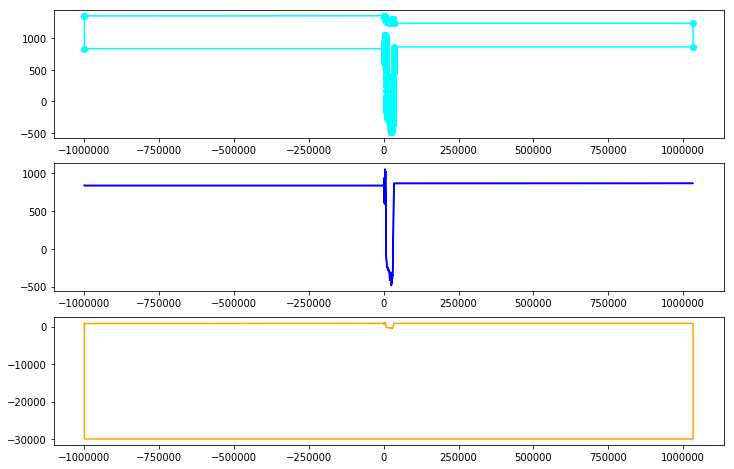

In [107]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))
axes[0].plot(xs, iceoutline, color='cyan', marker='o')
axes[1].plot(xs, wateroutline, color='blue')
axes[2].plot(xs, rockoutline, color='orange')

### 2) No ice base?

3.6323105069


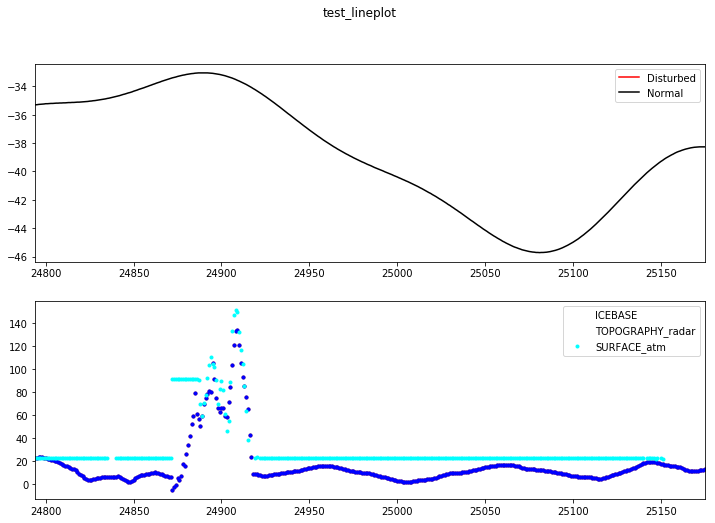

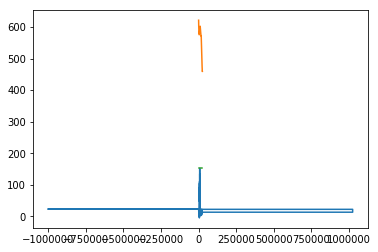

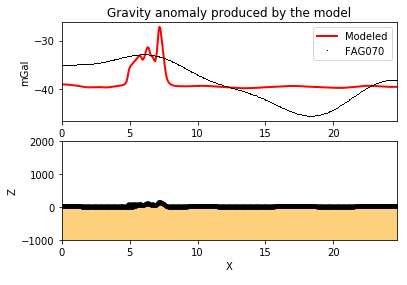

In [21]:
segment = 1274276308
# gb[["TIME", "FAG070"]].get_group(segment)
lf = gb.get_group(segment)
oib_lineplot_cust(lf)
lf.ix[lf['SURFACE_atm']-lf['ICEBASE'] <= 0, 'ICEBASE'] = (lf['SURFACE_atm'] - 0.1)

# Compute distance along transect
dist = np.zeros((np.size(lf['LONG'])))
for i in range(2, np.size(lf['LONG'])):
    dist[i] = dist[i - 1] + haversine([lf['LAT'].values[i - 1],lf['LONG'].values[i - 1]],
              [lf['LAT'].values[i],lf['LONG'].values[i]])
'''
Extract data from DataFrame
'''
fag070 = lf['FAG070'][0:].values
elevation = lf['WGSHGT'][0:].values
icesfc = lf['SURFACE_atm'][0:].values
icebase = lf['ICEBASE'][0:].values
'''
Convert OIB data to polygon arrays
'''
# iceoutline = np.append(np.concatenate([icesfc, icebase[::-1]], axis=0), icesfc[0]) # no extension
iceoutline = make_outline(icesfc, icebase)
# plt.figure(facecolor='white'); plt.plot(iceoutline[1180:1220])

rockbase = -30000*np.ones_like(icebase)
# rockoutline = np.append(icebase[0], np.concatenate([icebase, z_r], axis=0), icebase[0], icebase[0])
rockoutline = make_outline(icebase, rockbase)

x = dist * 1000
xs = make_outline_dist(x, 1e6)
# plt.figure(facecolor='white'); plt.plot(xs[1180:1220])

# depths of calculations points
# z = elevation + 2000
z = int(np.max(icesfc)+1)*np.ones_like(x)

plt.figure(facecolor='white')
plt.plot(xs, iceoutline) 
plt.plot(x, elevation)
plt.plot(x, z) 
'''
Build the Polygon
'''
props = {'density': rho_r - rho_i}
props2 = {'density': rho_r}
polygon = Polygon(np.transpose([xs, iceoutline]), props)
polygons = [Polygon(np.transpose([xs, iceoutline]), props), 
            Polygon(np.transpose([xs, rockoutline]), props2)
            ]
'''
Forward Model
'''
gz = talwani.gz(x, z, polygons)
gz_adj = (gz - np.mean(gz)) + np.mean(fag070)
n = len(gz_adj)
rmse = np.linalg.norm(gz_adj - fag070) / np.sqrt(n)
print rmse
'''
Plot
'''
###
mpl.figure(facecolor='white')
mpl.axis('scaled')
ax1 = mpl.subplot(2, 1, 1)
mpl.title(r"Gravity anomaly produced by the model")
mpl.plot(x, gz_adj, '-r', linewidth=2, label='Modeled')
# mpl.plot(x, gz-fag070, '-b', linewidth=1)
mpl.plot(x, fag070, color='k', linestyle="None", marker=',', label='FAG070')
mpl.xlim(min(x), max(x))
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e3))
ax1.xaxis.set_major_formatter(ticks_x)
mpl.ylabel("mGal")
mpl.legend()
ax1.annotate('rmse: '+str(int(rmse))+' mGal', xy=(10, 0), xytext=(10, 0))
###
ax2 = mpl.subplot(2, 1, 2)
mpl.polygon(polygons[0], '.-k', linewidth=1, fill='cyan', alpha=0.5)
mpl.polygon(polygons[1], '.-k', linewidth=1, fill='orange', alpha=0.5)
mpl.xlim(min(x), max(x))
mpl.ylim(-1000, 2000)
mpl.xlabel("X")
mpl.ylabel("Z")
ax2.xaxis.set_major_formatter(ticks_x)
mpl.savefig('figs/test_OIB_'+str(segment)+'_forward.png', bbox_inches='tight')
mpl.show()

## For FUN, let's try inverting

In [22]:
from fatiando.inversion import Smoothness1D
from fatiando.gravmag.basin2d import PolygonalBasinGravity
from fatiando import utils

# Make the solver using smoothness regularization and run the inversion
misfit = PolygonalBasinGravity(x, z, fag070, 100, props, top=0)
regul = Smoothness1D(misfit.nparams)
solver = misfit + 1e-4*regul
# print dir(misfit)

# This is a non-linear problem so we need to pick an initial estimate
initial = -100*np.ones(misfit.nparams)
solver.config('levmarq', initial=initial).fit()
# solver.estimate_.vertices

/usr/local/lib/python2.7/site-packages/fatiando/inversion/optimization.py:302: RuntimeWarning: Exited because maximum iterations reached. Might not have achieved convergence. Try inscreasing the maximum number of iterations allowed.
  RuntimeWarning)


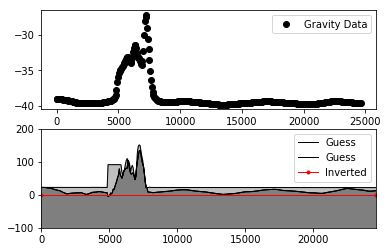

In [23]:
mpl.figure(facecolor='white')
mpl.subplot(2, 1, 1)
mpl.plot(x, gz_adj, 'ok', label='Gravity Data')
# mpl.plot(x, solver[0].predicted(), '-r', linewidth=2, label='predicted Gravity')
mpl.legend()
ax = mpl.subplot(2, 1, 2)
mpl.polygon(polygons[0], fill='gray', alpha=0.5, label='Guess')
mpl.polygon(polygons[1], fill='black', alpha=0.5, label='Guess')
# The estimate_ property of our solver gives us the estimate basin as a polygon
# So we can directly pass it to plotting and forward modeling functions
# mpl.plot(x[:70], depths[:29:-1], color='black', linewidth=10, label='Constraints')
mpl.polygon(solver.estimate_, style='.-r', label='Inverted')
# ax.invert_yaxis()
mpl.xlim(min(x), max(x))
mpl.ylim(-100, 200)
mpl.legend()
mpl.show()

# Sample regional gravity

In [23]:
T = pickle.load(open('antgg2015_bouger.p','rb'))

# Compute bathymetry
lon = lf['LONG'][0:].values
lat = lf['LAT'][0:].values
    
fag = np.zeros((np.size(lon)))
for i in range(np.size(lon)):
    cost_func = ((T['lons']-lon[i])**2) + ((T['lats']-lat[i])**2)
    xmin, ymin = np.unravel_index(cost_func.argmin(), cost_func.shape)
    fag[i] = -T['ell'][xmin, ymin]

NameError: name 'pickle' is not defined

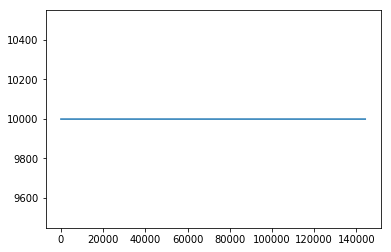

In [ ]:
plt.plot(x, fag)

# DEBUGGING

In [ ]:
bottom = np.array(lf['ICEBASE'])
# bottom = lf['BED_flat']
print bottom
# print lf['BED_flat'][28767]
# lf['BED_flat'][28767:b]
# lf['BED_flat'][0:]

[ 262.0974  275.5374  288.9532 ...,   17.8396   17.2373   16.6203]
